## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.collections import LineCollection

%matplotlib inline


# Ny-Ålesund radiosonde data

## Dataset resources

**Title:**     High resolution radiosonde measurements from station Ny-Ålesund (2017-04)

**Author**     Maturilli, Marion

**Year**       2017

**Institute**  Alfred Wegener Institute - Research Unit Potsdam

**DOI**        https://doi.org/10.1594/PANGAEA.879767

**License**    [Creative Commons Attribution 3.0 Unported](http://creativecommons.org/licenses/by/3.0/ "CC-BY-3.0")

**Funding information** Alfred Wegener Institute Helmholtz Centre for Polar and Marine Research.

## Reading example dataset

The Tab-delimited ASCII-file of the radiosonde data can be downloaded from PANGAEA using the link above and saved to the current working directory of this notebook. Headernames are selected from the file and the appropriate amount of headerlines determined. The file is then read into memory via NumPy's record-array import function. During import the datetime column is converted from strings to datetime objects.



In [2]:
headernames = ['date', 'lat', 'long', 'alt', 'h', 'etim', 'pppp', 'ttt', 'rh', 'dd', 'ff']
str2date = lambda s: dt.datetime.strptime(s, '%Y-%m-%dT%H:%M:%S')
data = np.recfromtxt('./NYA_radiosonde_2017-04.tab', names=headernames, skip_header=23, converters={'date': str2date}, encoding='utf8')

## Pre-processing of the imported data

As the imported record array contains all radiosonde launches from one month (here April 2017), the altitude, pressure, temperature and relative humidity are split into daily chunks.

In [3]:
mindate = min(data.date)
maxdate = max(data.date)
days = range((maxdate-mindate).days)
minday = dt.datetime(mindate.year, mindate.month, mindate.day)

h_profiles = {}
p_profiles = {}
t_profiles = {}
rh_profiles = {}

for d in [minday+dt.timedelta(days=i) for i in days]:
    cond = (data.date>d) & (data.date<d+dt.timedelta(days=1))
    h_profiles[d] = data.h[cond]
    p_profiles[d] = data.pppp[cond]
    t_profiles[d] = data.ttt[cond]
    rh_profiles[d] = data.rh[cond]

## Plotting radiosonde profiles

Selected profiles can now be plotted as a color-coded collection of individual lines using Matplotlib's LineCollection function.

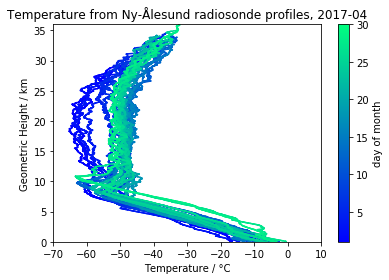

In [4]:
fig, ax = plt.subplots(1)
ax.set_title(u'Temperature from Ny-Ålesund radiosonde profiles, 2017-04')
ax.set_xlim(-70,10)
ax.set_xlabel(u'Temperature / °C')
ax.set_ylim(0,36)
ax.set_ylabel(u'Geometric Height / km')
line_segments = LineCollection([list(zip(t_profiles[minday+dt.timedelta(days=d)], h_profiles[minday+dt.timedelta(days=d)]/1000.0)) for d in days], 
                               cmap=plt.get_cmap('winter'))
line_segments.set_array(np.array(days))
line_segments.set_clim(vmin=1, vmax=30)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('day of month')


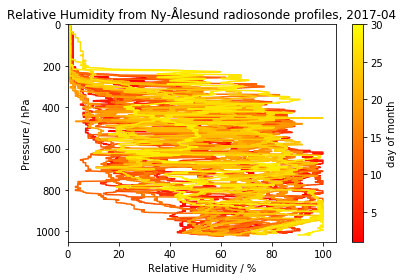

In [5]:
fig, ax = plt.subplots(1)
ax.set_title(u'Relative Humidity from Ny-Ålesund radiosonde profiles, 2017-04')
ax.set_xlim(0,105)
ax.set_xlabel(u'Relative Humidity / %')
ax.set_ylim(1050,0)
ax.set_ylabel(u'Pressure / hPa')
line_segments = LineCollection([list(zip(rh_profiles[minday+dt.timedelta(days=d)], p_profiles[minday+dt.timedelta(days=d)])) for d in days], 
                               cmap=plt.get_cmap('autumn'))
line_segments.set_array(np.array(days))
line_segments.set_clim(vmin=1, vmax=30)
ax.add_collection(line_segments)
axcb = fig.colorbar(line_segments)
axcb.set_label('day of month')
